In [1]:
from typing import TypedDict,List
from langgraph.graph import StateGraph
import math

In [11]:
class Agentstate(TypedDict):
  values:List
  name:str
  operation:str
  result: str

In [14]:
def operation(state:Agentstate)->Agentstate:
  state['result'] = (
        f"Hi {state['name']}, Your answer is "
        f"{sum(state['values']) if state['operation'] == '+' else math.prod(state['values'])}"
    )
  return state


In [15]:
graph=StateGraph(Agentstate)

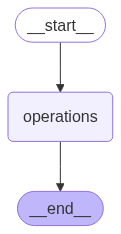

In [16]:
graph.add_node("operations",operation)
graph.set_entry_point("operations")
graph.set_finish_point("operations")
graph.compile()

In [17]:
app=graph.compile()

In [23]:
ans=app.invoke({'values':[1,2,5],'name':'sam','operation':'*'})

In [24]:
print(ans)

{'values': [1, 2, 5], 'name': 'sam', 'operation': '*', 'result': 'Hi sam, Your answer is 10'}


In [26]:
ans=app.invoke({'values':[1,2,5],'name':'sam','operation':'+'})

In [27]:
print(ans)

{'values': [1, 2, 5], 'name': 'sam', 'operation': '+', 'result': 'Hi sam, Your answer is 8'}
